In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df.set_index("Month",inplace=True)

# Exploratory data analysis

<AxesSubplot:xlabel='Month'>

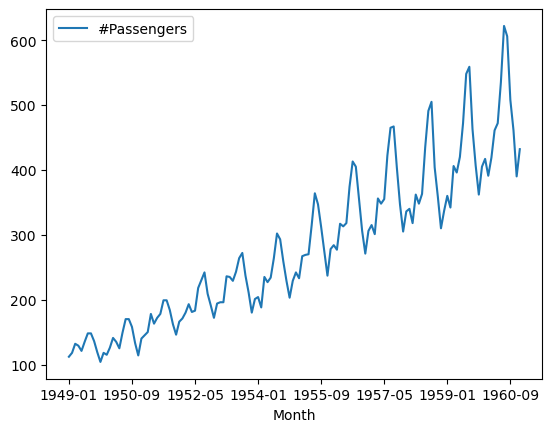

In [6]:
df.plot(kind="line")

# visualize using grids

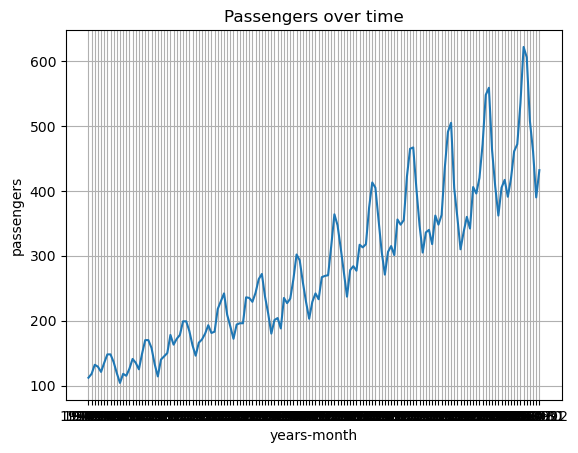

<Figure size 4000x1000 with 0 Axes>

In [7]:
plt.plot(df.index,df["#Passengers"])
plt.xlabel("years-month")
plt.ylabel("passengers")
plt.title("Passengers over time")
plt.grid(True)
plt.figure(figsize=(40,10))
plt.show()

# Performing adfuller test

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
results=adfuller(df["#Passengers"])

In [10]:
results[1]

0.991880243437641

p value=0.9,hence we cant reject the null hypothesis.

# perform seasonal decomposition

In [11]:
import seaborn as sns

In [12]:
result=seasonal_decompose(df["#Passengers"],model='multiplicative',period=12)

<AxesSubplot:xlabel='Month', ylabel='trend'>

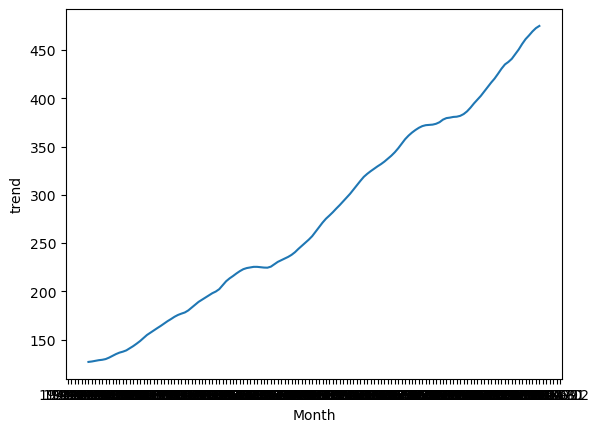

In [13]:
sns.lineplot(data=result.trend)



<AxesSubplot:xlabel='Month', ylabel='seasonal'>

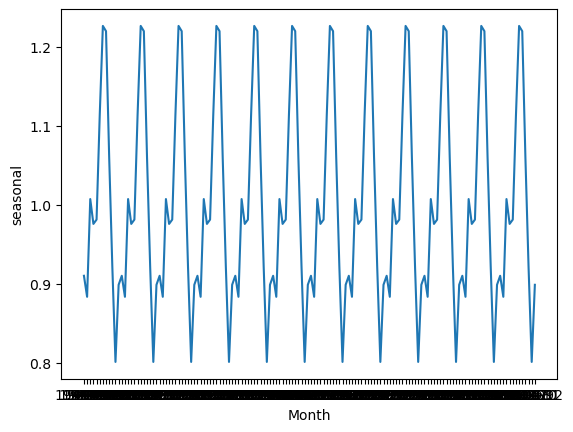

In [14]:
sns.lineplot(data=result.seasonal)

Performing differencing

In [15]:
results=adfuller(df["#Passengers"].diff().dropna())
print(results[1])

0.054213290283826474


Perform 2nd order differencing

In [16]:
results=adfuller(df["#Passengers"].diff().diff().dropna())
print(results[1])

2.7328918500141235e-29


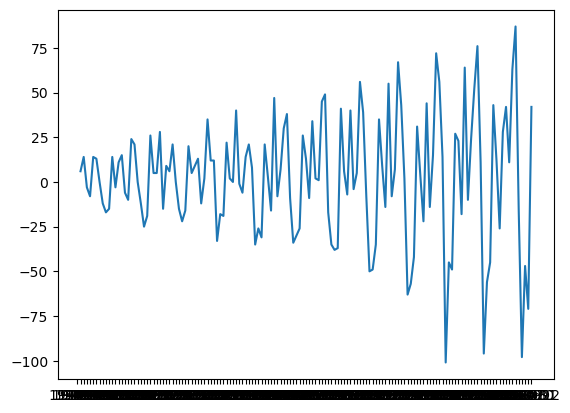

In [17]:
plt.plot(df["#Passengers"].diff())

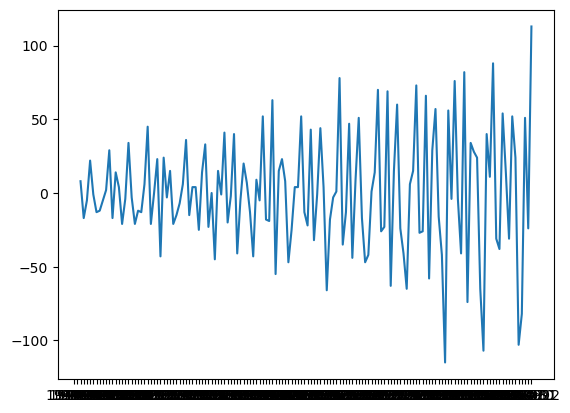

In [18]:
plt.plot(df["#Passengers"].diff().diff())

By differencing we subtract the tuple and its shifted value.
We perform differencing to establish stationarity,remove seasonality,reduce trend.
Hence we obtain data whose mean and variance don't change over time.

Arima model is used to obtain the forecasts by reducing noise in the data.It acts as a filter

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

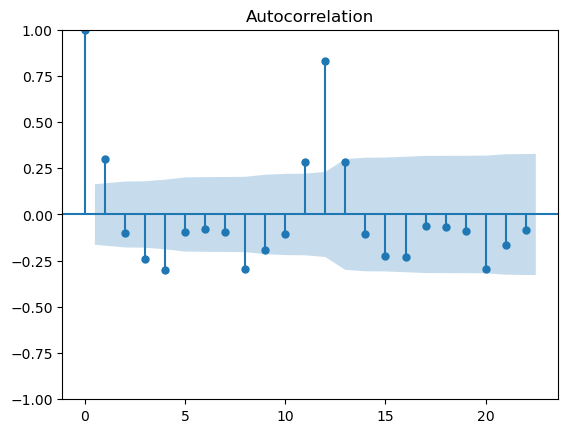

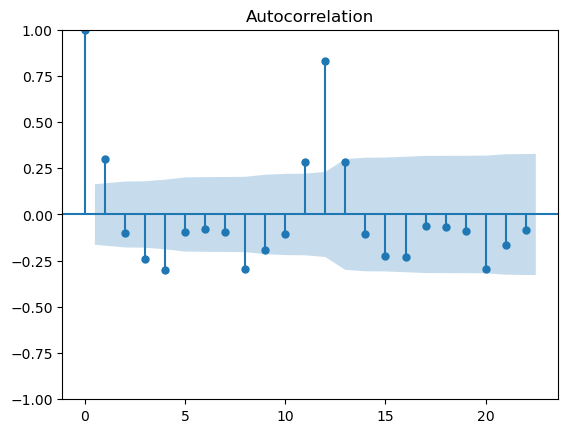

In [20]:
sm.graphics.tsa.plot_acf(df.diff().dropna())

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


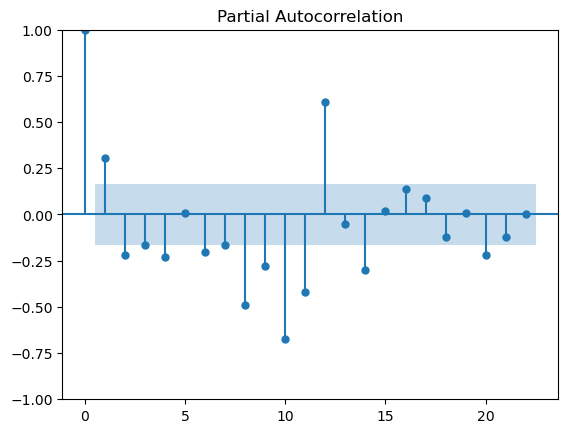

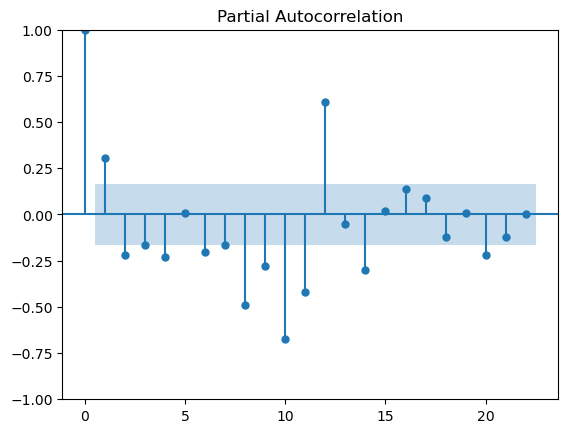

In [21]:
plot_pacf(df.diff().dropna())

In [22]:
p=2
d=1
q=1

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model=SARIMAX(df["#Passengers"],order=(p,d,q))
fit_model=model.fit()
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -685.169
Date:                Wed, 31 Jul 2024   AIC                           1378.338
Time:                        21:11:05   BIC                           1390.190
Sample:                    01-01-1949   HQIC                          1383.154
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0907      0.083     13.190      0.000       0.929       1.253
ar.L2         -0.4890      0.097     -5.046      0.000      -0.679      -0.299
ma.L1         -0.8439      0.073    -11.486      0.0

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
df.tail(5)

,#Passengers
Month,
1960-08,606
1960-09,508
1960-10,461
1960-11,390
1960-12,432


In [26]:
steps=24
forecast=fit_model.get_forecast(steps=steps)


In [27]:
forecast

In [28]:
print(forecast.predicted_mean)

1961-01-01    471.000383
1961-02-01    492.998177
1961-03-01    497.918890
1961-04-01    492.528738
1961-05-01    484.243730
1961-06-01    477.843463
1961-07-01    474.914377
1961-08-01    474.849500
1961-09-01    476.211067
1961-10-01    477.727786
1961-11-01    478.716191
1961-12-01    479.052519
1962-01-01    478.936006
1962-02-01    478.644465
1962-03-01    478.383472
1962-04-01    478.241382
1962-05-01    478.214038
1962-06-01    478.253697
1962-07-01    478.310322
1962-08-01    478.352687
1962-09-01    478.371203
1962-10-01    478.370681
1962-11-01    478.361057
1962-12-01    478.350816
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot:>

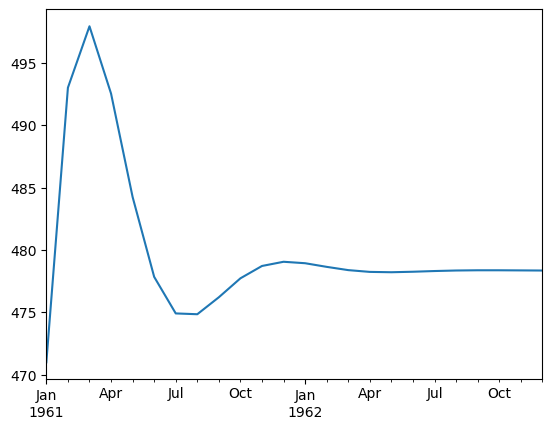

In [29]:
forecast.predicted_mean.plot(kind="line")

In [32]:
def soothsay(steps_size):
    forecasting=fit_model.get_forecast(step=steps_size)
    dataframe=pd.DataFrame(forecasting.predicted_mean)
    dataframe.plot(kind="line")
